In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import seaborn as sns

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

In [3]:
folder_path_no = "/content/drive/MyDrive/Projet daoudi/no"
folder_path_yes = "/content/drive/MyDrive/Projet daoudi/yes"

folder_no = os.listdir(folder_path_no)
folder_yes = os.listdir(folder_path_yes)

print(len(folder_no))
print(len(folder_yes))

106
155


In [4]:
folder_no[:4]

['15 no.jpg', '29 no.jpg', 'No21.jpg', 'No14.jpg']

In [5]:
## We can consider
   # No Tumor  >> 0
   # Yes Tumor >> 1

no_label = [0]*len(folder_no)
yes_label = [1]*len(folder_yes)

labels = no_label + yes_label
print(len(labels))

261


In [6]:
print(labels[:5])
print(labels[-5:])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


Image data preprocessing


In [7]:
# Convert image into numpy array
# Resize image ino 224 x 224 x 3
# Image Visualization
# Scale the image array
data = []

for img in folder_no:
    image = Image.open("/content/drive/MyDrive/Projet daoudi/no/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

for img in folder_yes:
    image = Image.open("/content/drive/MyDrive/Projet daoudi/yes/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

In [8]:
len(data)

261

In [ ]:
data[0].shape

(224, 224, 3)

array([[[ 55,  55,  55],
        [100, 100, 100],
        [ 59,  59,  59],
        ...,
        [147, 147, 147],
        [159, 159, 159],
        [149, 149, 149]],

       [[136, 136, 136],
        [116, 116, 116],
        [  3,   3,   3],
        ...,
        [133, 133, 133],
        [102, 102, 102],
        [113, 113, 113]],

       [[ 11,  11,  11],
        [ 13,  13,  13],
        [  0,   0,   0],
        ...,
        [135, 135, 135],
        [120, 120, 120],
        [113, 113, 113]],

       ...,

       [[133, 133, 133],
        [  2,   2,   2],
        [  7,   7,   7],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[126, 126, 126],
        [  0,   0,   0],
        [  5,   5,   5],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 82,  82,  82],
        [  2,   2,   2],
        [ 51,  51,  51],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
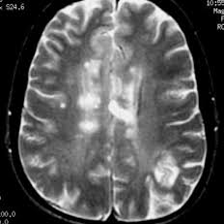

In [12]:
x = np.array(data)
y = np.array(labels)
x[0]

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Split the data


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
print("x_vailidation shape",x_validation.shape)
print("y_validation shape",y_validation.shape)

x_train shape (234, 224, 224, 3)
x_test shape (13, 224, 224, 3)
y_train shape (234,)
y_test shape (13,)
x_vailidation shape (14, 224, 224, 3)
y_validation shape (14,)


array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)
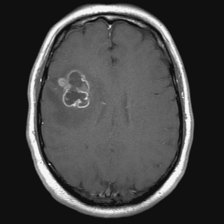

In [ ]:
x_train[0]

In [ ]:
y_train

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

Image data visualization

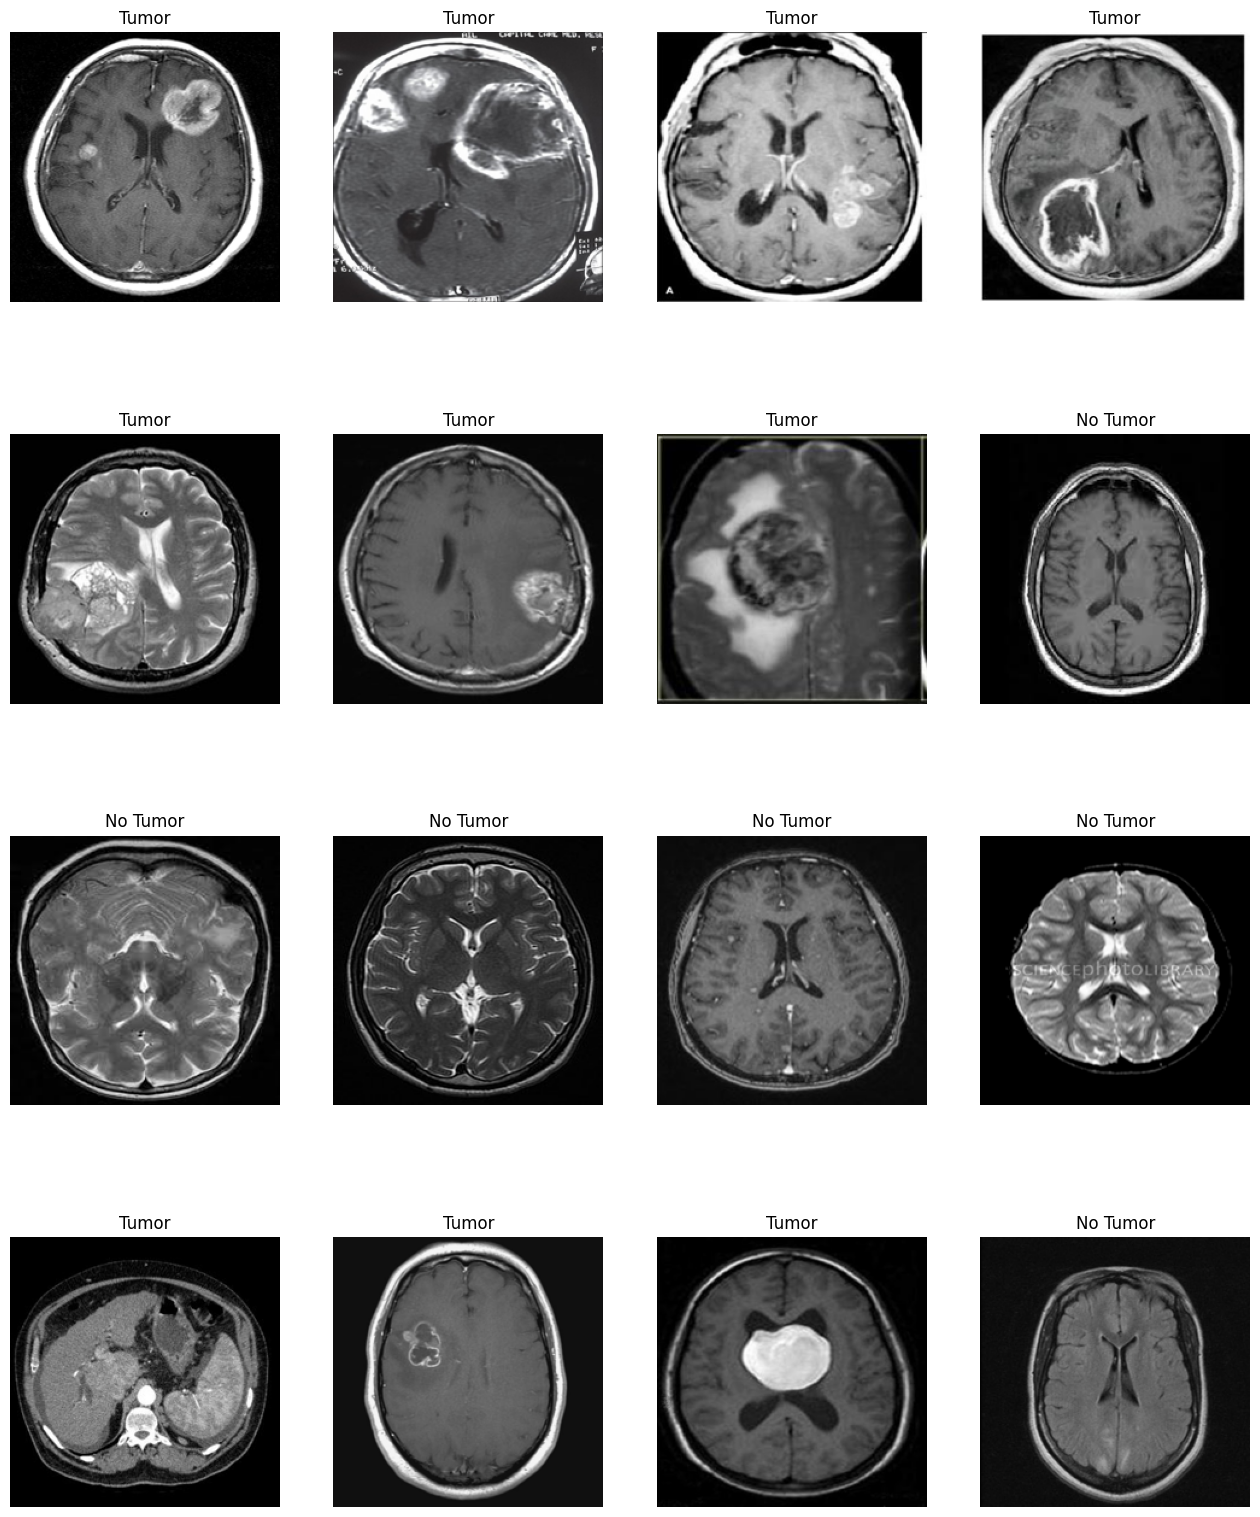

In [18]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"{class_labels[y_train[i]]}")
    plt.axis("off")

Scale the data

In [19]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

Using Pretrained Model ResNet152 : Model-1

In [36]:
from tensorflow.keras.applications import ResNet50, ResNet101, ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Customize the top classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [23]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

1/1 [==============================] - 7s 7s/step
Accuracy on Validation Set: 0.429 %


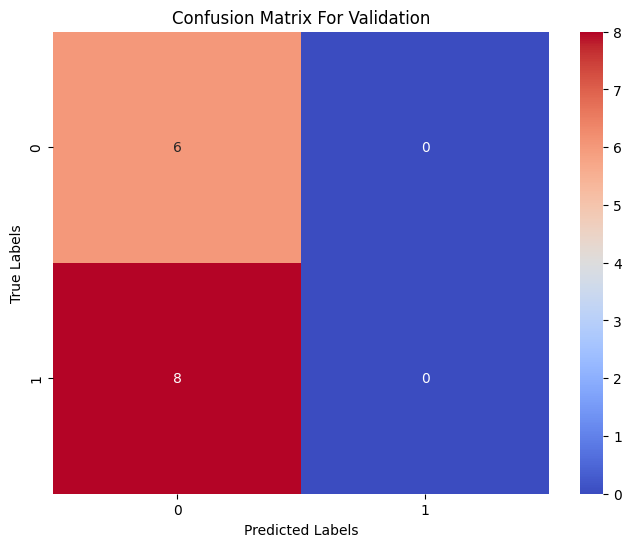

In [31]:
predictions = model.predict(x_validation)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

conf_matrix = confusion_matrix(y_validation, binary_predictions)

accuracy = accuracy_score(y_validation, binary_predictions)
print("Accuracy on Validation Set: {:.3f} %".format(accuracy))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'coolwarm')
plt.title('Confusion Matrix For Validation')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

1/1 [==============================] - 6s 6s/step
Accuracy on Test Set: 0.385 %


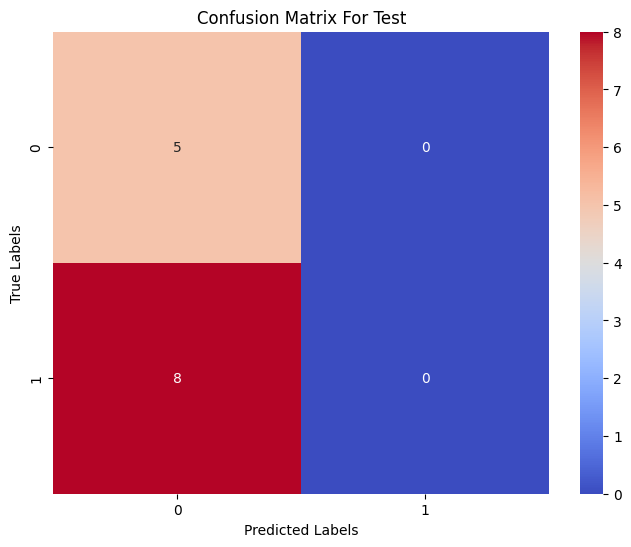

In [32]:
predictions = model.predict(x_test)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

conf_matrix = confusion_matrix(y_test, binary_predictions)

accuracy = accuracy_score(y_test, binary_predictions)
print("Accuracy on Test Set: {:.3f} %".format(accuracy))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap = 'coolwarm')
plt.title('Confusion Matrix For Test')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [34]:
loss_resnet, accuracy_resnet = model.evaluate(x_test,y_test)

1/1 [==============================] - 13s 13s/step - loss: 1.4384 - accuracy: 0.3846


Evaluation Metrics Train-Test

In [ ]:
loss, acc = model.evaluate(x_train_scaled,y_train)
print("Accuracy on Train Data:",acc)

8/8 [==============================] - 151s 19s/step - loss: 0.1790 - accuracy: 0.9188
Accuracy on Train Data: 0.9188033938407898


In [ ]:
loss, acc = model.evaluate(x_test_scaled,y_test)
print("Accuracy on Test Data:",acc)

1/1 [==============================] - 13s 13s/step - loss: 0.3318 - accuracy: 0.9231
Accuracy on Test Data: 0.9230769276618958


In [ ]:
y_pred = model.predict(x_test_scaled)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]

1/1 [==============================] - 18s 18s/step


Confusion Matrix - Classification Repor

In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[ 4  1]
 [ 1 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.95      0.95      0.95        21

    accuracy                           0.92        26
   macro avg       0.88      0.88      0.88        26
weighted avg       0.92      0.92      0.92        26



ROC-Curve

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [ ]:
y_prob = model.predict(x_test_scaled)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

# Compute ROC curve and ROC area
roc_auc = auc(fpr, tpr)
print(f"ROC - Area :{roc_auc}")

1/1 [==============================] - 13s 13s/step
ROC - Area :0.8380952380952381


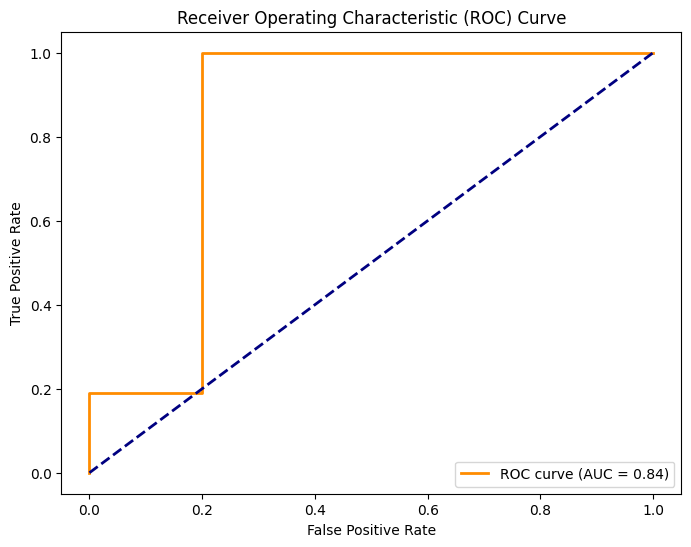

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Actual & Predicted Image

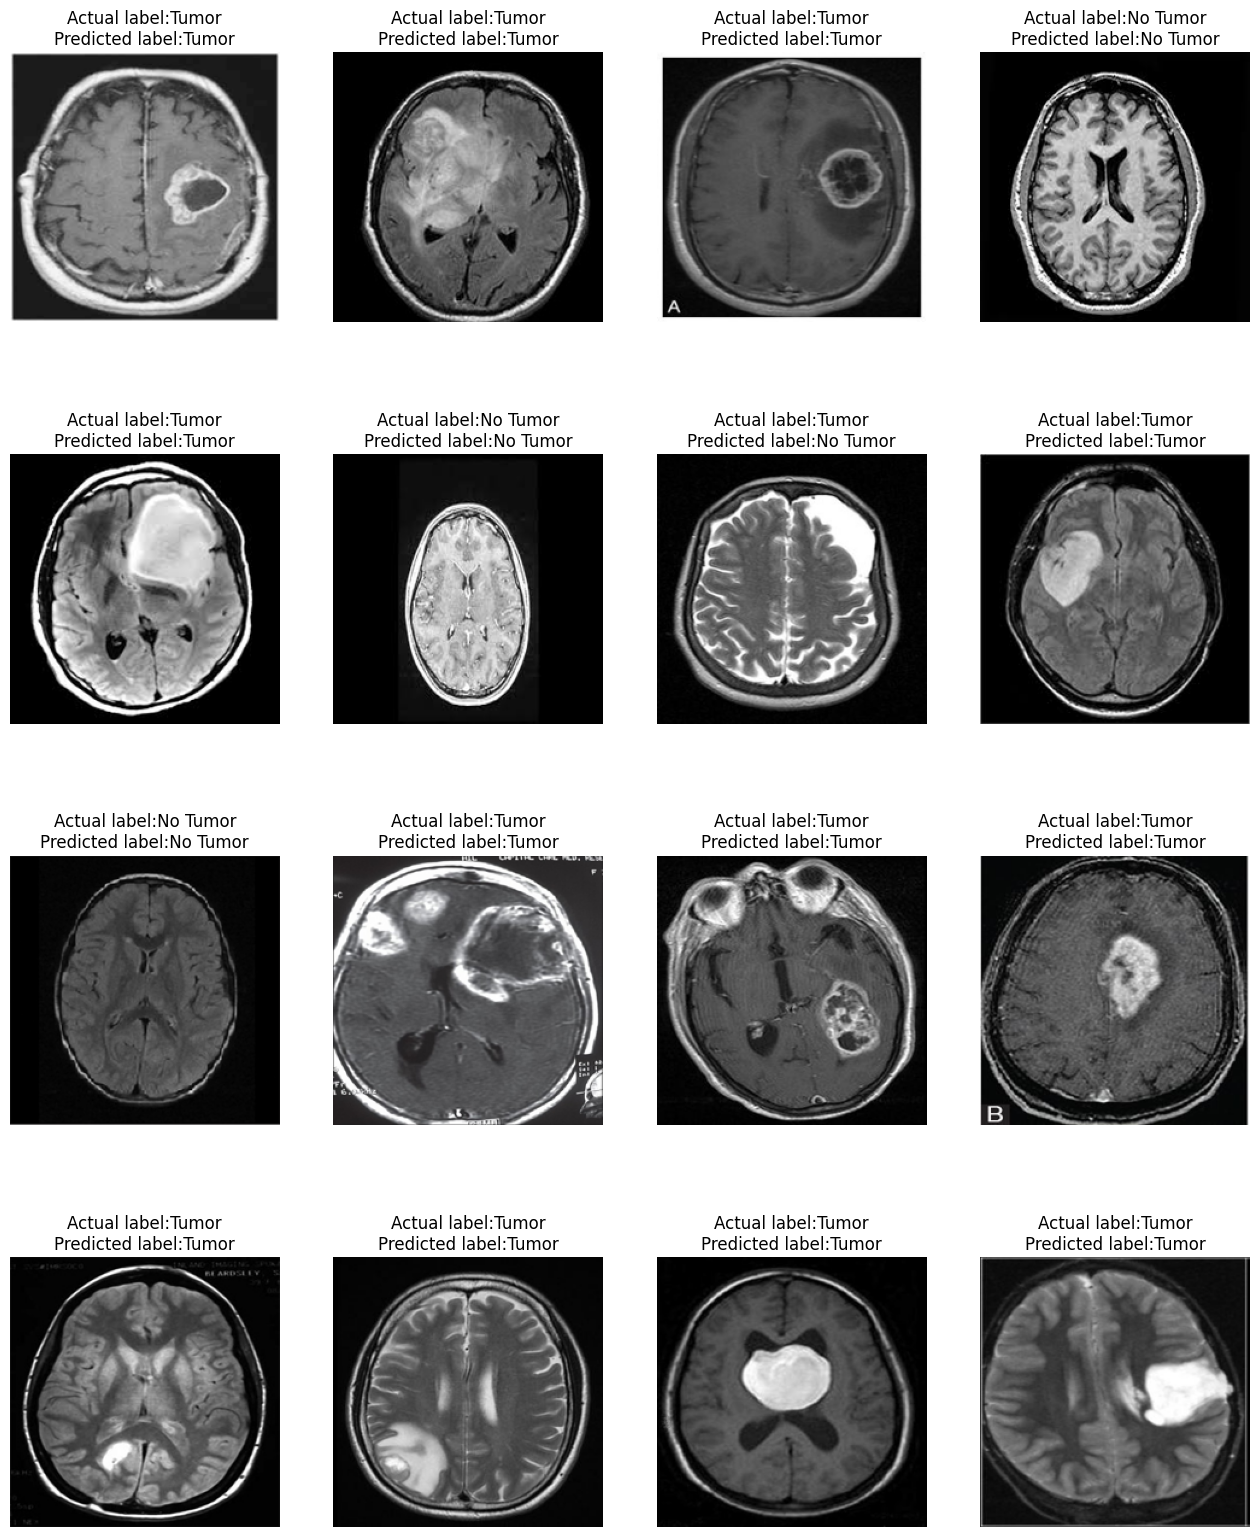

In [ ]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual label:{class_labels[y_test[i]]}\nPredicted label:{class_labels[y_pred[i]]}")
    plt.axis("off")